### Summary Project Description
Projek ini merupakan projek yang ditujukan sebagai Final Project pada training Introduction to Python for Data Science - Indonesia Power. Projek ini akan menganalisis data produk peralatan bayi dari dataset yang diperoleh dari amazon.com yang mana terdiri dari berbagai jenis produk beserta rating yang muncul dari konsumen.

#### Import Libraries

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import csv

#### Load Dataset

In [2]:
data = pd.read_csv(r'amazon_reviews_us_Shoes_v1_00.tsv',sep='\t', error_bad_lines=False)

b'Skipping line 54101: expected 15 fields, saw 22\nSkipping line 55857: expected 15 fields, saw 22\nSkipping line 60448: expected 15 fields, saw 22\n'
b'Skipping line 76918: expected 15 fields, saw 22\nSkipping line 87925: expected 15 fields, saw 22\nSkipping line 88500: expected 15 fields, saw 22\nSkipping line 114276: expected 15 fields, saw 22\nSkipping line 128751: expected 15 fields, saw 22\n'
b'Skipping line 136095: expected 15 fields, saw 22\nSkipping line 140007: expected 15 fields, saw 22\nSkipping line 177148: expected 15 fields, saw 22\nSkipping line 180087: expected 15 fields, saw 22\nSkipping line 183010: expected 15 fields, saw 22\nSkipping line 183949: expected 15 fields, saw 22\nSkipping line 192879: expected 15 fields, saw 22\n'
b'Skipping line 223261: expected 15 fields, saw 22\nSkipping line 240588: expected 15 fields, saw 22\nSkipping line 247955: expected 15 fields, saw 22\nSkipping line 249336: expected 15 fields, saw 22\nSkipping line 259363: expected 15 fields, 

In [3]:
data.tail(10)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
4358810,US,36163484,R39ORJC13QRYEF,B000066TD0,832333657,Women's Evette Mid-Shaft Boots,Shoes,1,0,0,N,N,What a waste,"I purchased this shoe because it looked good, ...",2002-10-30
4358811,US,38079272,R20V5DDXLTC7J1,B000066TCQ,552886106,Women's Bree Suede Moc Snow Joggers,Shoes,5,1,1,N,N,You want it! You need it!,This little shoe-boot is so great if you're th...,2002-10-16
4358812,US,35452244,R372A16VI3IGYC,B0000644Z0,626916650,Women's CanvasMule Shoes,Shoes,5,0,0,N,N,Cute,"The backless mule is very comfortable , cute ,...",2002-09-02
4358813,US,52573608,RDK1QNLBXJAQL,B00004VWK5,686597599,Birki's Super Birki Unisex Clog,Shoes,5,10,11,N,N,Graceless and Immense - Comfy and Cool,"My garden clogs make my feet look huge, and ev...",2002-03-24
4358814,US,44751832,R3N4YTU9U8GPLV,B00000J067,125201678,Floor Spinner,Shoes,2,0,0,N,N,This toy is not a must have,This toy looks like more fun than it really is...,2001-04-02
4358815,US,49734568,R2C0JM229QZS0R,B000035X8T,249415522,Fox Men's Featherlite Shoe Lace-Up,Shoes,4,1,6,N,N,Get it All,If you are a fan of &quot;extreme sports&quot;...,2000-04-07
4358816,US,51790352,R3CBWUG8E05BFU,B00000J067,125201678,Floor Spinner,Shoes,1,5,5,N,N,Looks can be deceiving,This toy has gotten rave reviews from adults b...,2000-01-27
4358817,US,50804984,RN7TB51V24XHT,B00000J067,125201678,Floor Spinner,Shoes,4,7,7,N,N,My seven month old loves this toy!,My seven month old son loves to watch me shake...,1999-12-03
4358818,US,50704055,R22CRGBKA02SPB,B00000J067,125201678,Floor Spinner,Shoes,5,3,3,N,N,What a wonderful toy!,All three of my children have enjoyed watching...,1999-12-01
4358819,US,52332820,R1NR3UYEZ0M8KQ,B00000J067,125201678,Floor Spinner,Shoes,1,12,13,N,N,my baby shows no interest in this toy,I had high hopes for this one after I read its...,1999-11-08


In [4]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31


#### Mengecek dan merubah tipe data untuk rating

In [5]:
print(data['star_rating'])

0          1
1          5
2          4
3          5
4          3
          ..
4358815    4
4358816    1
4358817    4
4358818    5
4358819    1
Name: star_rating, Length: 4358820, dtype: int64


#### Membuat cluster kategori rating
Pada tahapan ini di buat pengkategorian rating menjadi LOW, MIDDLE dan HIGH dengan algoritma pengkonidisin. Namun sebelumnya merubah tipe data untuk kolom star-rating

In [6]:
rating = ['LOW','MIDDLE','HIGH']

def rating_y(y):
    if y<=2:
        return rating[0]
    elif y>=4:
        return rating[2]
    else:
        return rating[1]
data['rating_cat'] = data['star_rating'].apply(rating_y)

In [7]:
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,rating_cat
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31,LOW
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31,HIGH
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31,HIGH
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31,HIGH
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31,MIDDLE


#### Mengeliminasi beberapa kolom

In [8]:
data_baby=data.drop(['marketplace', 'review_id',
                      'product_id','product_parent',
                      'product_category','helpful_votes',
                       'total_votes','vine',
                       'verified_purchase','review_headline',
                     'review_date','customer_id',
                      'product_title',], axis=1)

In [9]:
data_baby1=data_baby.head(50000)
data_baby1.head(5)

,star_rating,review_body,rating_cat
0,1,Do not buy: really didn't start to wear them u...,LOW
1,5,provides great cushion as well as archsupport,HIGH
2,4,It's perfect if you need something small for c...,HIGH
3,5,Getting what u see,HIGH
4,3,small,MIDDLE


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

In [11]:
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer("[a-z']+")

def tokenize(text):
    tokens = tokenizer.tokenize(text)
    return [stemmer.stem(t) for t in tokens] 

def get_tf(data_baby1, use_idf, max_df=1.0, min_df=1, ngram_range=(1,1)):
    if use_idf:
        m = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    else:
        m = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', ngram_range=ngram_range, tokenizer=tokenize)
    
    d = m.fit_transform(data_baby1.values.astype('U'))
    
    return m, d
tf_m, tf_d = get_tf(data_baby1['review_body'], use_idf=False, max_df=0.90, min_df=10)
tfidf_m, tfidf_d = get_tf(data_baby1['review_body'], use_idf=True, max_df=0.90, min_df=10)

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [12]:
n_topics = 10

def get_lda(data_baby1, topics):
    m = LatentDirichletAllocation(n_components=topics, n_jobs=-1, learning_method='online').fit(data_baby1)
    d = m.transform(data_baby1)
    return m, d

def get_kmeans(data_baby1, k, scale=True):
    if scale:
        s = MinMaxScaler()
        data = s.fit_transform(data_baby1)
    
    m = KMeans(n_clusters=k).fit(data_baby1)
    d = m.predict(data_baby1)
    return m, d        

lda_m, lda_d = get_lda(tf_d, n_topics)
kmean_m, kmean_d = get_kmeans(tfidf_d, n_topics, scale=False)

In [13]:
def show_topics(model, feature_names, n_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_words - 1:-1]]))
    print()

In [14]:
def show_cluster_topics(cluster_labels, tf_matrix, feature_names, n_words):
    d = pd.DataFrame(tf_matrix.toarray())
    d['c'] = cluster_labels
    d = d.groupby('c').sum().T
    
    for col in d:
        top_n = d[col].nlargest(n_words).index.tolist()
        print("Cluster #%d:" % col)
        print(", ".join([feature_names[i]
                for i in top_n]))
    print()

In [15]:
print("Top 15 stemmed words per topic in LDA model\n")
show_topics(lda_m, tf_m.get_feature_names(), 15)

Top 15 stemmed words per topic in LDA model

Topic #0:
great, veri, comfort, good, shoe, fit, look, sandal, price, qualiti, expect, product, comfi, excel, cute
Topic #1:
pair, shoe, year, wear, buy, bought, time, use, i'v, anoth, new, month, old, son, purchas
Topic #2:
bag, purs, use, come, flop, flip, came, pictur, sure, color, lot, pocket, zipper, everyth, wallet
Topic #3:
boot, great, recommend, wear, high, style, leather, sock, gift, everyday, winter, leg, uncomfort, smell, warm
Topic #4:
perfect, fit, size, just, cute, big, super, shoe, right, true, purchas, order, sneaker, want, great
Topic #5:
shoe, feet, wear, comfort, day, support, walk, veri, wide, arch, narrow, work, foot, heel, good
Topic #6:
br, like, realli, look, don't, just, littl, i'm, worn, strap, feel, becaus, onli, toe, make
Topic #7:
love, color, shoe, daughter, absolut, favorit, jean, wrong, croc, black, seller, gorgeous, pink, calv, sometim
Topic #8:
size, order, small, shoe, run, return, fit, wear, half, larg, l

In [16]:
print("Top 15 stemmed words per cluster in Kmeans model\n")
show_cluster_topics(kmean_d, tfidf_d, tfidf_m.get_feature_names(), 15)

Top 15 stemmed words per cluster in Kmeans model

Cluster #0:
love, like, veri, fit, look, boot, great, pair, expect, excel, cute, just, wear, comfort, color
Cluster #1:
nice, veri, shoe, look, comfort, fit, price, good, qualiti, love, boot, realli, great, small, expect
Cluster #2:
good, veri, shoe, qualiti, product, fit, look, price, comfort, expect, feel, servic, great, buy, far
Cluster #3:
great, shoe, fit, price, look, product, love, boot, comfort, qualiti, buy, feel, work, pair, sandal
Cluster #4:
love, shoe, son, daughter, comfort, boot, color, sandal, bag, cute, pair, comfi, fit, just, buy
Cluster #5:
perfect, fit, love, shoe, comfort, size, great, veri, qualiti, look, just, color, boot, expect, thank
Cluster #6:
comfort, veri, shoe, love, cute, fit, great, happi, stylish, wear, sandal, look, super, day, light
Cluster #7:
beauti, shoe, love, comfort, veri, color, fit, boot, absolut, bag, size, perfect, just, great, qualiti
Cluster #8:
size, small, order, shoe, fit, run, half, we

In [18]:
def get_svd(data_baby1, components):
    svd = TruncatedSVD(n_components=components).fit(data_baby1)
    o = pd.DataFrame(svd.transform(data_baby1), columns=range(0,components))
    return svd,o

def get_tsne(data_baby1, components, perplexity):
    tsne = TSNE(n_components=components, perplexity=perplexity, n_iter=1000)
    o = pd.DataFrame(tsne.fit_transform(data_baby1), columns=range(0,components))
    return tsne,o

svd_v, svd_m = get_svd(tfidf_d, 50)
tnse_v, tsne_m = get_tsne(svd_m, 2, 25)

lda_c = lda_d.argmax(axis=1)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

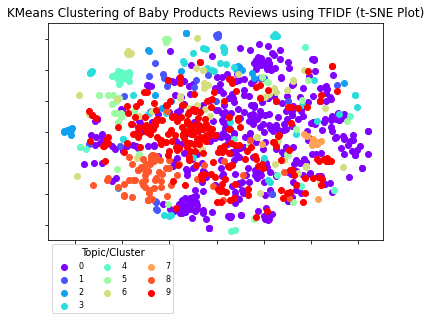

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

def plot_scatter_2d(x, y, c, sample_size, title):
    df = pd.DataFrame({'x': x, 'y': y, 'c': c}).sample(sample_size)
    l = len(np.unique(c))
    
    ax = plt.subplot(111)
    colors = cm.rainbow(np.linspace(0, 1, l))
                                   
    for c in range(0,l):
        qq = df[df['c']==c]
        ax.scatter(qq['x'], qq['y'],c=colors[c], label=c)
    plt.legend(loc='upper left', numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title='Topic/Cluster')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(title)
    plt.show()

get_ipython().run_line_magic('matplotlib', 'inline')
plot_scatter_2d(tsne_m[0], tsne_m[1], kmean_d, 1000, 'KMeans Clustering of Baby Products Reviews using TFIDF (t-SNE Plot)')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

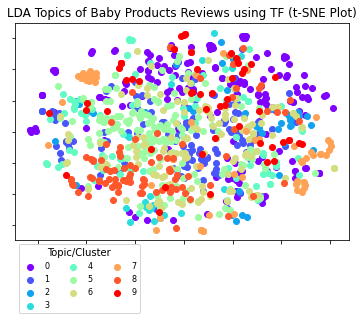

In [22]:
get_ipython().run_line_magic('matplotlib', 'inline')
plot_scatter_2d(tsne_m[0], tsne_m[1], lda_c, 1000, 'LDA Topics of Baby Products Reviews using TF (t-SNE Plot)')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_d, 
                                                    data_baby1['rating_cat'], 
                                                    test_size=0.3)

In [25]:
from sklearn import svm
def calculate_cv(X, y):
    results = {
        'lr': [],
        'svm': [],
        'nb': [],
        'combined': []
    }
    lm = LogisticRegression()
    svm = LinearSVC()
    nb = MultinomialNB()
    vc = VotingClassifier([('lm', lm), ('svm', svm), ('nb', nb)])
    
    for c in rating:
        y_adj = np.array(y==c)
        results['lr'].append((cross_val_score(lm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['svm'].append((cross_val_score(svm, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['nb'].append((cross_val_score(nb, X, y_adj, cv=10, scoring='accuracy').mean(), c))
        results['combined'].append((cross_val_score(vc, X, y_adj, cv=10, scoring='accuracy').mean(), c))
    return results

cv_scores = calculate_cv(X_test, y_test)

print("Model accuracy predictions\n")
for m,s in cv_scores.items():
    for ss in s:
        print("{M} model ({R} rating): {S:.1%}".format(M=m.upper(), R=ss[1], S=ss[0]))
    print()

NameError: name 'LinearSVC' is not defined